<br>
I tried a tuned CatBoostClassifier model.<br>


## Result

I used optuna for tuning hyperparameters.<br>

|          	| Score   	|
|----------	|---------	|
| Test ACC 	| 77.92 % 	|
| ROC AUC  	| 0.77037 	|
| MCC      	| 0.52911 	|



In [1]:
# Importing dependencies

import warnings
warnings.filterwarnings('ignore') 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, matthews_corrcoef,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay

from catboost import CatBoostClassifier

In [2]:
# Reading data

data = pd.read_csv('/kaggle/input/diabetes-factors/diabetes-vid.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead


In [3]:
data['Outcome'].value_counts()

alive    500
dead     268
Name: Outcome, dtype: int64

In [4]:
# Seperating into data features and target

X = data.iloc[:, :-1]
y = data['Outcome']

# Encoding classes

LB = LabelBinarizer()
y = LB.fit_transform(y)

In [5]:
# Splitting dataset for train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True ,stratify = y, random_state = 10 )


print("X_train shape -> ", X_train.shape)
print("X_test shape -> ", X_test.shape)

X_train shape ->  (614, 8)
X_test shape ->  (154, 8)


In [6]:
# Scaled all features

train_MMS  = MinMaxScaler()
test_MMS  = MinMaxScaler()

X_train = train_MMS.fit_transform(X_train)
X_test = test_MMS.fit_transform(X_test)

# <span style="color:#e74c3c;"> CatBoostClassifier </span> Model

In [7]:
# Training with tuned CatBoostClassifier model

model = CatBoostClassifier(iterations = 10000, learning_rate = 0.0020001,  depth= 14, l2_leaf_reg= 2.5, min_child_samples= 19)

model.fit(X_train, y_train,  verbose = 2000)

0:	learn: 0.6917106	total: 114ms	remaining: 18m 55s
2000:	learn: 0.0915051	total: 4m 28s	remaining: 17m 52s
4000:	learn: 0.0376281	total: 9m	remaining: 13m 31s
6000:	learn: 0.0213692	total: 13m 38s	remaining: 9m 5s
8000:	learn: 0.0146220	total: 18m 18s	remaining: 4m 34s
9999:	learn: 0.0110194	total: 22m 55s	remaining: 0us


# <span style="color:#e74c3c;"> Results </span> 

In [8]:
# Predicting and calculating some metrics

pred = model.predict(X_test)

acc = accuracy_score(y_test, pred)*100
mcc = matthews_corrcoef(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)

print('Test Accuracy : {0:.2f} %'.format(acc))
print('ROC AUC Score : {0:.5f}'.format(roc_auc))
print('Matthews Correlation Coefficient(MCC)  : {0:.5f}'.format(mcc))


rep = classification_report(y_test, pred) 
print(rep)

Test Accuracy : 77.92 %
ROC AUC Score : 0.77037
Matthews Correlation Coefficient(MCC)  : 0.52911
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       100
           1       0.67      0.74      0.70        54

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154



# <span style="color:#e74c3c;"> Plotting </span> Confusion Matrix

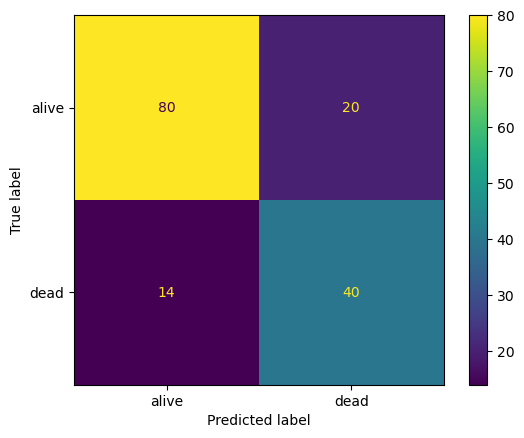

In [9]:
# Plotting the confusion matrix 

cm = confusion_matrix(y_test, pred )
disp = ConfusionMatrixDisplay(cm, display_labels= LB.classes_)
disp.plot()

# <span style="color:#e74c3c;"> Plotting </span> ROC Curve

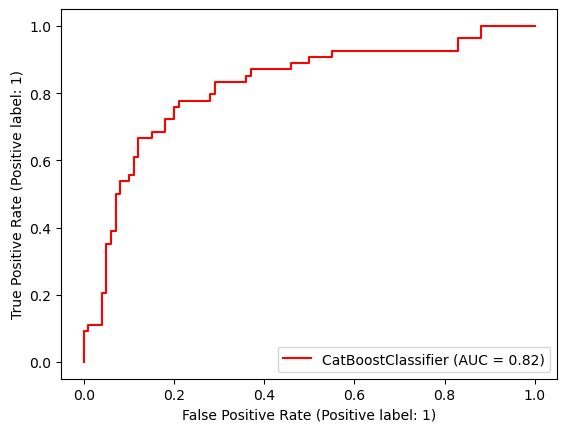

In [10]:
# Plotting the ROC Curve 

RocCurveDisplay.from_estimator(model, X_test, y_test, color='red')